<a href="https://colab.research.google.com/github/enakai00/tfp_examples/blob/main/DNN_regression_for_means_and_variances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
import tensorflow_probability as tfp
tfd = tfp.distributions

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
def create_dataset(num):
  xs = np.linspace(0, 1, 501)
  ys = 1-np.cos(2*np.pi*xs) + np.random.normal(scale=1.2*0.5*0.5-1.2*(xs-0.5)*(xs-0.5))
  ys = np.random.normal(scale=np.sin(np.pi*xs))
  return xs, ys

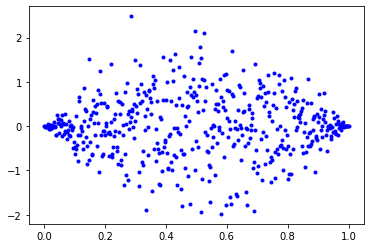

In [ ]:
xs, ys = create_dataset(500)
plt.plot(xs, ys, 'b.')

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(1,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mse')

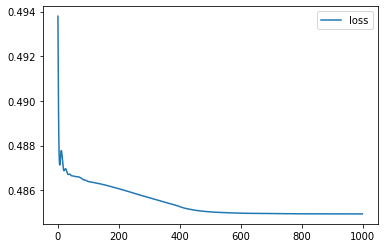

In [ ]:
history = model.fit(xs, ys, batch_size=len(xs), epochs=1000, verbose=0)
DataFrame({'loss': history.history['loss']}).plot()

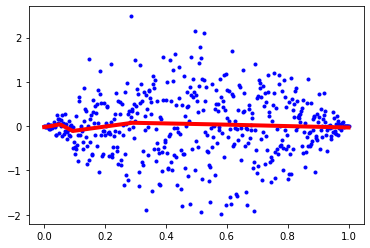

In [ ]:
pred_ys = model.predict(xs)
plt.plot(xs, ys, 'b.')
plt.plot(xs, pred_ys, 'r', linewidth=4)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(1,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2)) # predict loc and scale
model.add(tfp.layers.DistributionLambda(
      lambda t: tfd.Normal(loc=t[..., :1], scale=tf.math.softplus(t[..., 1:]))
      ))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
_________________________________________________________________
distribution_lambda (Distrib ((None, 1), (None, 1))    0         
Total params: 2,274
Trainable params: 2,274
Non-trainable params: 0
_________________________________________________________________


In [ ]:
negloglik = lambda y, rv_y: -rv_y.log_prob(y)
model.compile(optimizer='adam', loss=negloglik)

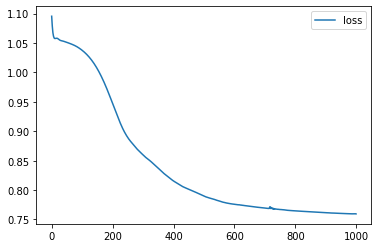

In [ ]:
history = model.fit(xs, ys, batch_size=len(xs), epochs=1000, verbose=0)
DataFrame({'loss': history.history['loss']}).plot()

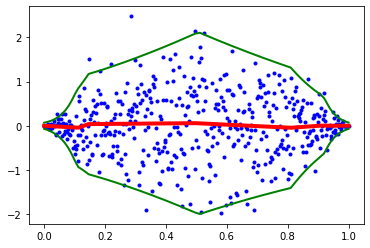

In [ ]:
yhat = model(xs)
plt.plot(xs, ys, 'b.');

m = yhat.mean()
s = yhat.stddev()

plt.plot(xs, m, 'r', linewidth=4, label='mean');
plt.plot(xs, m + 2 * s, 'g', linewidth=2, label=r'mean + 2 stddev')
plt.plot(xs, m - 2 * s, 'g', linewidth=2, label=r'mean - 2 stddev')

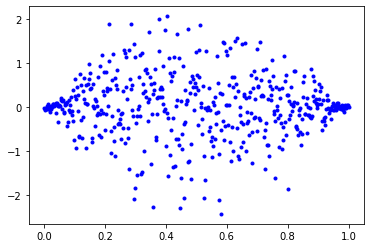

In [ ]:
plt.plot(xs, yhat.sample(), 'b.')